In [1]:
import sqlite3

import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval
from operator import itemgetter
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [2]:
conn = sqlite3.connect('../../Data/Experiment_2/exp2_remote.db')
dat = pd.read_sql('SELECT * FROM trials A INNER JOIN subjects B ON A.subject_id = B.id WHERE B.completion=1', con=conn)

# Comprehension

In [3]:
dat.groupby('prolificID')#.count()

ValueError: Grouper for 'prolificID' not 1-dimensional

In [ ]:
anim.to_csv('animate_moral_dat.csv', sep=',')

In [3]:
anim = dat.loc[(dat.anim_check == 1) &
              (dat.tower_check == 1 ) & (dat.agent_check==1)]

In [4]:
inanim = dat[['inanim' in x for x in dat.exp_cond]]
inanim = inanim.loc[(dat.anim_check == 1) & (dat.tower_check == 1 )]

In [ ]:
inanim.to_csv('inanimate_dat.csv', sep=',')

In [5]:
dat = pd.concat([anim, inanim])

In [6]:
dat = pd.DataFrame(dat.values[:,~dat.columns.duplicated()], columns=dat.columns[~dat.columns.duplicated()])

len(dat.prolificID.unique())

391

In [7]:
ids = dat.groupby(['prolificID', 'exp_cond']).count()
nn = ids.loc[ids.subject_id > 1 ].sort_values('exp_cond').reset_index()

In [8]:

dat['cause_agent'] = dat['cause_agent'].apply(literal_eval)
dat['cause_patient'] = dat['cause_patient'].apply(literal_eval)
dat['num_moves_cause_agent'] = [len(x) for x in dat.cause_agent]
dat['agent'] = dat.cause_agent.map(lambda x: x[-1])
dat['num_moves_cause_patient'] = [len(x) for x in dat.cause_patient]
dat['patient'] = dat.cause_patient.map(lambda x:x[-1])
dat['exp_cond'] = dat.exp_cond.map(lambda x: x.split('_'))
dat[['animacy', 'norm_violation']] = dat['exp_cond'].transform({'item1': itemgetter(0), 'item2': itemgetter(1)})

xx = dat.groupby('prolificID').count().id > 1
extrasubs = xx.loc[xx.values == True].index.tolist()

In [9]:
yy = dat.loc[dat.prolificID == extrasubs[0]]

In [10]:
for subj in extrasubs:
    dat.drop(dat.loc[dat.prolificID == subj].index[0], inplace=True)
dat.reset_index(drop=True, inplace=True)

In [18]:
dat.to_csv('../../Data/Experiment_2/dat_brandon_1_11_22.csv', sep=',')


In [11]:
dat_long = dat.melt(id_vars=['prolificID', 'animacy', 'norm_violation'], value_vars=['agent', 'patient'],
                    var_name='candidate', value_name='causal rating')

Text(0.5, 1.0, 'Animate')

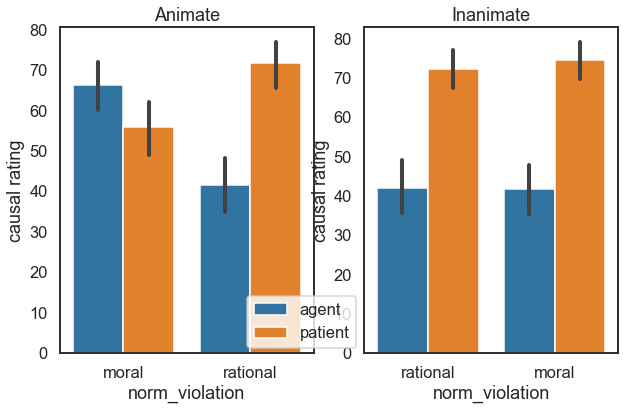

In [12]:
sns.set_context(context='talk')
f, ax = plt.subplots(figsize=(10,6),nrows=1, ncols=2, sharey='col')
gg = sns.barplot(data=dat_long.loc[dat_long.animacy == 'animate'], x='norm_violation', y='causal rating', hue='candidate', ax=ax[0])
#gg = sns.swarmplot(data=dat_long.loc[dat_long.animacy == 'animate'], x='norm_violation', y='causal rating', hue='candidate', dodge=True,  color=".2", ax=ax[0], label=None)
g = sns.barplot(data=dat_long.loc[dat_long.animacy == 'inanimate'], x='norm_violation', y='causal rating',hue='candidate', ax=ax[1])
#g = sns.swarmplot(data=dat_long.loc[dat_long.animacy == 'inanimate'], x='norm_violation', y='causal rating',hue='candidate',dodge=True, color=".2", ax=ax[1], label='_nolegend_')  
gg.get_legend().remove()
g.legend(bbox_to_anchor=(0., 0.2, 0., 0.))
g.set_title('Inanimate')
gg.set_title('Animate')
#plt.savefig('exp2_pilota.png')

In [19]:
dat_long.loc[dat_long.animacy == 'inanimate', 'norm_violation'] = 'none (objects)'

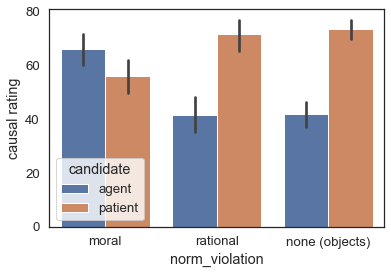

In [25]:
#sns.set(font_scale=1.2)
#sns.set_context("talk")
sns.set_style("white")
sns.barplot(x='norm_violation', y='causal rating', hue='candidate', data=dat_long)
plt.savefig('Figures/causexnormxanim.png', dpi=300)

In [12]:

dat.groupby(['animacy','norm_violation']).count()

id  prolificID  jspsychID  time_elapse  \
animacy   norm_violation                                            
animate   moral           100         100        100          100   
          rational         97          97         97           97   
inanimate moral            98          98         98           98   
          rational         99          99         99           99   

                          cause_agent  cause_patient  cause_agent_rt  \
animacy   norm_violation                                               
animate   moral                   100            100             100   
          rational                 97             97              97   
inanimate moral                    98             98              98   
          rational                 99             99              99   

                          cause_patient_rt  anim_check  tower_check  ...  \
animacy   norm_violation                                             ...   
animate   moral                        100         100          100  ...   
          rational                      97          97           97  ...   
inanimate moral                         98          98           98  ...   
          rational                      99          99           99  ...   

                          sub_feedback2  subject_id  date  completion  \
animacy   norm_violation                                                
animate   moral                      99         100   100         100   
          rational                   97          97    97          97   
inanimate moral                      98          98    98          98   
          rational                   98          99    99          99   

                          compelete_time  exp_cond  num_moves_cause_agent  \
animacy   norm_violation                                                    
animate   moral                        0       100                    100   
          rational                     0        97                     97   
inanimate moral                        0        98                     98   
          rational                     0        99                     99   

                          agent  num_moves_cause_patient  patient  
animacy   norm_violation                                           
animate   moral             100                      100      100  
          rational           97                       97       97  
inanimate moral              98                       98       98  
          rational           99                       99       99  

[4 rows x 22 columns]

In [13]:
dat=dat.loc[~dat.id.isin([217,126, 98, 93])]

In [17]:
dat_long = dat.melt(id_vars=['prolificID', 'animacy', 'norm_violation'], value_vars=['agent', 'patient'],
                    var_name='candidate', value_name='causal rating')

#dat_long.appled(lambda row: 1 if row['animacy']== 'animate'&)
for i, row in dat_long.iterrows():
    if row['animacy'] == 'animate':
        if row['norm_violation'] == 'moral':
            dat_long.loc[i, 'cond'] = 'Agent violates moral norm'
        else:
            dat_long.loc[i, 'cond'] = 'Agent violates rational norm'
    elif row['animacy'] == 'inanimate':
        dat_long.loc[i, 'cond'] = 'Objects'

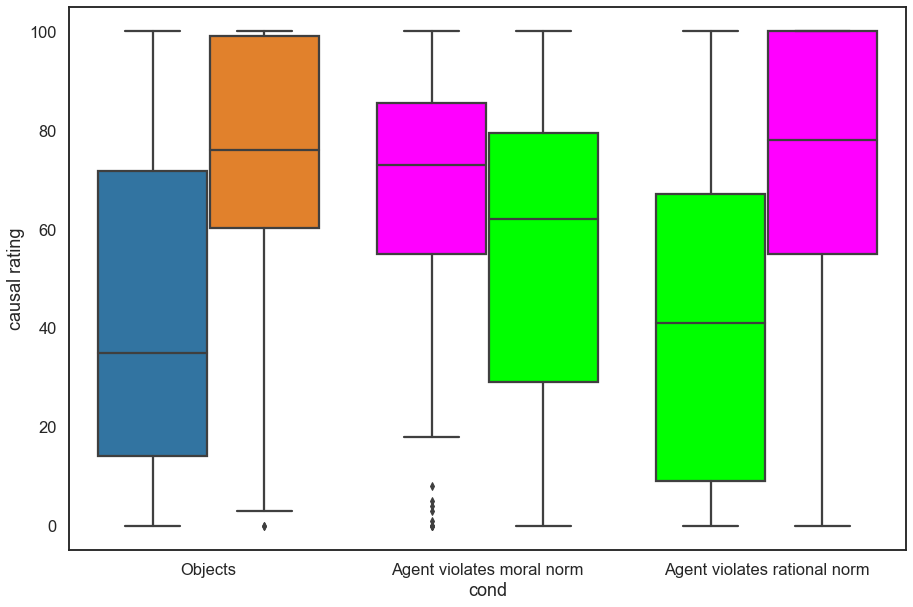

In [36]:
f,ax = plt.subplots(figsize=(15, 10))
#sns.catplot(x='cond', y='causal rating', hue='candidate', kind='box', data=dat_long, ax=ax)
g = sns.boxplot(x='cond', y='causal rating', hue='candidate', data=dat_long, ax=ax,)
#g.legend(bbox_to_anchor=(0,0,1,0))
plt.legend([],[], frameon=False)

g.artists
g.artists[2].set_facecolor("#FF00FF")
g.artists[3].set_facecolor("#00FF00")
g.artists[4].set_facecolor("#00FF00")
g.artists[5].set_facecolor("#FF00FF")

plt.savefig('Figures/exp2_causexcond_prop.png')

AttributeError: 'FacetGrid' object has no attribute 'artists'

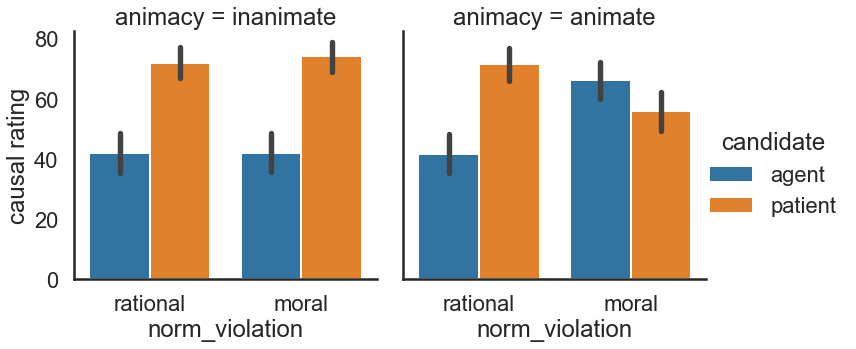

In [19]:
sns.set_context('poster')
g = sns.catplot(x='norm_violation', y='causal rating', hue='candidate', col='animacy', kind='bar', data=dat_long)
cc = ["#F0F000","#FF00FF", "#FF00FF","#F0F000","#F0F000", "#FF00FF"]
for i in range(6):
    box = g.artists[i]
    box.set_facecolor(cc[i])
#plt.savefig('Figures/exp2_causexcond.png')